## BIG G EXPRESS EDA STEP 2 - 4/7/2022
### ROLL ON EIGHTEEN WHEELERS

In [39]:
# IMPORT LIBRARIES

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,\
    mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

#### CORRELATIONS, etc. (** TO DO **)

In [5]:
jfaults_prepped = pd.read_csv('../data/jfaults_prepped.csv')

In [6]:
jfaults_prepped.head()

,Unnamed: 0,RecordID,ESS_Id,EventTimeStamp,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
0,0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,1,2,1439,105354361,38.857638,-84.626851,2015-02-21 11:34:25.000
1,1,2,990360,2015-02-21 11:34:34.000,NaN,unknown,unknown,unknown,unknown,11,629,12,1,127,1439,105354361,38.857638,-84.626851,2015-02-21 11:35:10.000
2,2,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,unknown,unknown,unknown,unknown,11,1807,2,1,127,1369,105336226,41.421018,-87.767361,2015-02-21 11:36:08.000
3,3,6,990431,2015-02-21 11:40:22.000,Low (Severity Low) Engine Coolant Level,04993120*00025921*082113134117*07700053*I0*BBZ*,79466580,6X1u10D1500000000,CMMNS,0,111,17,1,1,1417,105438630,33.043564,-96.179722,2015-02-21 11:40:59.000
4,4,7,990439,2015-02-21 11:40:52.000,Low (Severity Low) Engine Coolant Level,unknown,unknown,unknown,unknown,0,111,17,1,2,1597,105344243,36.902916,-86.436481,2015-02-21 11:41:29.000


#### SIMPLE LINEAR-REGRESSION APPROACH - SEE 3/12/2022 Intro_Linear_Regression.ipynb

(ONE PREDICTOR)

In [7]:
linreg = LinearRegression()

In [27]:
X = jfaults_prepped[['activeTransitionCount']]
y = jfaults_prepped['spn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 321)

In [28]:
linreg.fit(X_train, y_train)

LinearRegression()

In [29]:
linreg.intercept_

5588.226488522059

In [30]:
linreg.coef_

array([-34.91566345])

In [31]:
linreg.predict(jfaults_prepped[['activeTransitionCount']])

array([5518.39516162, 1153.93723029, 1153.93723029, ..., 5413.64817127,
       5553.31082507, 5308.90118092])

In [32]:
mean_squared_error(y_train, linreg.predict(X_train))

700919823.3057517

In [33]:
mean_squared_error(y_test, linreg.predict(X_test))

704141507.2017102

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


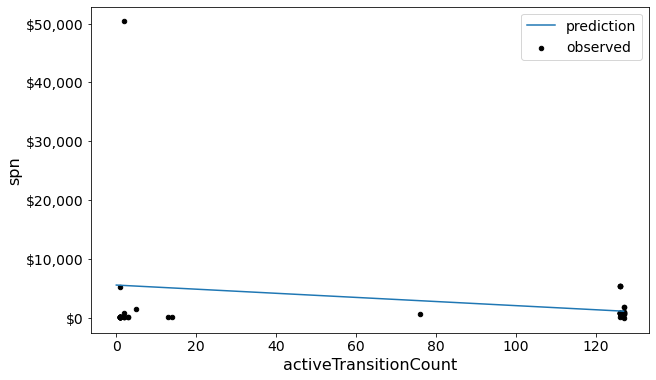

In [34]:
x_grid = np.linspace(start = 0, \
                     stop = np.max(jfaults_prepped['activeTransitionCount']\
                              .head(25)))
y_grid = linreg.predict(x_grid.reshape(-1, 1))

fontsize = 16

fig, ax = plt.subplots(figsize = (10,6))


plt.plot(x_grid, 
         y_grid, 
         label = 'prediction')

jfaults_prepped.head(50).plot(kind = 'scatter',
                              x = 'activeTransitionCount',
                              y = 'spn',
                              ax = ax,
                              color = 'black',
                              label = 'observed')

plt.legend(fontsize = fontsize - 2)


plt.xlabel('activeTransitionCount', fontsize = fontsize)
plt.ylabel('spn', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
plt.yticks(fontsize = fontsize - 2)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'));

#### LOGISTIC-REGRESSION APPROACH - SEE 3/24/2022 Penguins_Linear_Regression-Interactions-sklearn.ipynb

(THREE PREDICTORS)

In [42]:
logreg_vars = ['activeTransitionCount']
categor_vars = ['eventDescription', 'active']

X = jfaults_prepped[logreg_vars]
y = jfaults_prepped['spn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 321)

In [43]:
# TO DO - GETTING ERRORS

ohe = OneHotEncoder(sparse = False,
                    drop = 'first')
ohe.fit(X_train[categor_vars])

KeyError: "None of [Index(['eventDescription', 'active'], dtype='object')] are in the [columns]"

In [37]:
linreg2_coefficients = pd.DataFrame({
    'variable': ['intercept'] + linreg2_predictors,
    'coefficient': [linreg2.intercept_] + list(linreg2.coef_)
})

coefficients

NameError: name 'linreg2' is not defined

In [ ]:
mean_squared_error(y_train, linreg2.predict(X_train))

In [ ]:
#faults_grouped = jfaults_prepped.groupby([])[]\
#                                .sum().reset_index()

#faults_grouped.head()

#### PROCEED TO big_g_eda_2022-04-07-step2_RK FOR GEOSPATIAL JAZZ (** TO DO **)